In [18]:
# Basic functionalities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import pickle

In [19]:
# Text encoding
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# Visualization
from wordcloud import WordCloud

# Analyize the transcripts

#### Text Encoding

In [21]:
def dtm(corpus, stop_words='english', pickle_filename="", save_pickle=False):
    cv = CountVectorizer(stop_words=stop_words)
    data_cv = cv.fit_transform(corpus.Transcript)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
    data_dtm.index = corpus.index
    if save_pickle:
        pickle.dump(cv, open(pickle_filename, "wb"))        
    return data_dtm.transpose()

def tf_idf(corpus, stop_words='english', pickle_filename="", save_pickle=False):
    vectorizer = TfidfVectorizer(stop_words='english')
    data_v = vectorizer.fit_transform(corpus.Transcript)
    data_tfidf = pd.DataFrame(data_v.toarray(), columns=vectorizer.get_feature_names())
    data_tfidf.index = corpus.index
    if save_pickle:
        pickle.dump(vectorizer, open(pickle_filename, "wb"))        
    return data_tfidf.transpose()

#### Top words

In [22]:
def get_top_words(matrix_dataframe, number_of_words = 30):
    top_dict = {}
    for c in matrix_dataframe.columns:
        top = matrix_dataframe[c].sort_values(ascending=False).head(number_of_words)
        top_dict[c]= list(zip(top.index, top.values))
    return top_dict

In [23]:
# Get all kinds of corpus
clean_corpus = pd.read_pickle('./pickles/clean_corpus.pkl')
corpus_n = pd.read_pickle('./pickles/corpus_nouns.pkl')
corpus_na = pd.read_pickle('./pickles/corpus_na.pkl')

all_corpuses = [clean_corpus, corpus_n, corpus_na]

In [24]:
df_dtms = []
df_tf_idfs = []
dtm_tops = []
tf_idf_tops = []
for corpus in all_corpuses:
    # Document-Term Matrix
    df_dtm = dtm(corpus)
    # Tf-Idf Matrix
    df_tfidf = tf_idf(corpus)    
    # Get top words
    dtm_top = get_top_words(df_dtm)
    tf_idf_top = get_top_words(df_tfidf)
    
    df_dtms.append(df_dtm)
    df_tf_idfs.append(df_tfidf)
    dtm_tops.append(dtm_top)
    tf_idf_tops.append(tf_idf_top)

In [25]:
# Have a glimps on the top words of each comedians

df = pd.DataFrame(index=df_dtms[0].columns)
for i, corpus in enumerate(all_corpuses):
    dtm_top = dtm_tops[i]
    tf_idf_top = tf_idf_tops[i]
    df[f'corpus{i}_DTM'] = [[w[0] for w in words] for words in dtm_top.values()]
    df[f'corpus{i}_TF_IDF'] = [[w[0] for w in words] for words in tf_idf_top.values()]
    
df

corpus0_DTM  \
Comedian                                                                  
Amy Schumer           [like, im, just, dont, know, oh, thats, porn, ...   
Arsenio Hall          [phone, got, youre, shit, thats, oh, like, new...   
Aziz Ansari           [baby, like, im, ha, year, youre, got, theyre,...   
CHRIS ROCK            [thats, right, like, house, god, dont, religio...   
Chris Rock            [fuck, make, shit, yes, woman, fellas, fucking...   
Dave Chappelle        [got, years, dont, mike, forget, know, pence, ...   
Hasan Minhaj          [like, im, guys, just, dont, oh, thats, birthd...   
JACK WHITEHALL        [im, like, swimming, diarrhea, pool, sign, try...   
JO KOY                [slipper, josep, mom, keys, dont, know, like, ...   
Jimmy O. Yang         [like, just, know, thats, asian, good, got, re...   
Jo Koy                [mom, shit, like, dad, thats, im, foot, vicks,...   
Joe Rogan             [like, cat, know, just, dont, fuck, thats, you...   
Kevin Hart            [im, like, dont, know, bitch, gonna, shit, jus...   
MICHAEL CHE           [just, like, black, rights, civil, dont, thats...   
Michael McIntyre      [sexy, just, said, im, men, know, really, talk...   
Mike Epps             [got, ethiopians, gonna, like, forehead, yall,...   
Neal Brennan          [white, black, friends, people, like, got, ban...   
Ronny Chieng          [right, like, train, money, just, new, people,...   
Russell Peters        [russian, like, yeah, peter, hey, speak, mr, b...   
Sebastian Maniscalco  [like, right, gonna, im, people, pool, know, d...   
Trevor Noah           [like, dont, accent, know, people, just, black...   
Vir Das               [like, think, shit, just, guys, god, religion,...   
Whitney Cummings      [like, just, money, start, gonna, know, sex, m...   

                                                         corpus0_TF_IDF  \
Comedian                                                                  
Amy Schumer           [like, porn, im, just, girls, dating, funny, g...   
Arsenio Hall          [phone, motherfucker, palpitations, case, woke...   
Aziz Ansari           [baby, ha, chain, wallet, like, babies, year, ...   
CHRIS ROCK            [mistakes, ok, religion, house, shabba, god, t...   
Chris Rock            [yes, fellas, focus, cos, fuck, make, motherfu...   
Dave Chappelle        [pence, mike, forget, involved, anthem, brittl...   
Hasan Minhaj          [like, birthday, hersheys, im, guys, town, kid...   
JACK WHITEHALL        [swimming, diarrhea, sign, pool, hotel, active...   
JO KOY                [slipper, josep, keys, mom, kick, hawaii, hula...   
Jimmy O. Yang         [like, tip, represent, jimmy, asian, calculato...   
Jo Koy                [mom, vicks, foot, dad, shit, joseph, rice, pn...   
Joe Rogan             [cat, hamster, like, cats, dog, pet, dogs, oka...   
Kevin Hart            [im, harry, bitch, like, dont, ima, know, gonn...   
MICHAEL CHE           [rights, civil, matters, black, equal, agree, ...   
Michael McIntyre      [sexy, men, reverse, said, jumper, just, talki...   
Mike Epps             [ethiopians, motherfucking, forehead, got, yal...   
Neal Brennan          [white, black, friends, bang, rules, got, peop...   
Ronny Chieng          [train, money, doors, doctors, chinese, hope, ...   
Russell Peters        [russian, peter, mr, speak, dealer, anand, bly...   
Sebastian Maniscalco  [pool, bandaids, like, gonna, right, pounds, g...   
Trevor Noah           [accent, trevor, like, dont, black, unfriend, ...   
Vir Das               [religion, peace, selfie, hindus, chrislam, fu...   
Whitney Cummings      [like, money, sex, start, paying, dating, paid...   

                                                            corpus1_DTM  \
Comedian                                                                  
Amy Schumer           [im, guy, time, girl, thats, girls, end, porn,...   
Arsenio Hall          [phone, youre, motherfucker, thats, case, shes...   
Aziz Ans

Since there are too many words that are common among all the comedians, we need to add them to the stop-word list and redo the text encoding again.

#### Extract all common words among the comdeians

In [26]:
commons = []
for c in df.columns:
    words = []
    for r in df[c]:
        top = [word for word in r]
        for t in top:
            words.append(t)    
    commons.append(Counter(words).most_common())

In [27]:
commons[5]

[('shit', 9),
 ('im', 7),
 ('youre', 7),
 ('people', 7),
 ('time', 5),
 ('thats', 5),
 ('god', 5),
 ('white', 5),
 ('right', 4),
 ('oh', 4),
 ('hes', 4),
 ('woman', 4),
 ('gon', 4),
 ('man', 4),
 ('thing', 4),
 ('black', 4),
 ('dont', 4),
 ('parents', 4),
 ('mom', 4),
 ('okay', 4),
 ('guy', 3),
 ('date', 3),
 ('asian', 3),
 ('night', 3),
 ('fucking', 3),
 ('yeah', 3),
 ('kids', 3),
 ('kid', 3),
 ('house', 3),
 ('good', 3),
 ('money', 3),
 ('relationship', 3),
 ('dad', 3),
 ('weird', 3),
 ('work', 3),
 ('nice', 3),
 ('guys', 3),
 ('end', 2),
 ('cause', 2),
 ('worst', 2),
 ('person', 2),
 ('motherfucker', 2),
 ('case', 2),
 ('new', 2),
 ('shes', 2),
 ('today', 2),
 ('year', 2),
 ('sorry', 2),
 ('friends', 2),
 ('step', 2),
 ('kind', 2),
 ('things', 2),
 ('religion', 2),
 ('fellas', 2),
 ('women', 2),
 ('fuck', 2),
 ('dick', 2),
 ('mad', 2),
 ('matter', 2),
 ('small', 2),
 ('wedding', 2),
 ('pool', 2),
 ('family', 2),
 ('bit', 2),
 ('sexy', 2),
 ('foot', 2),
 ('chinese', 2),
 ('extra', 2)

In [28]:
common_words_list = []
for common in commons:
    new = [word for word, count in common if count > 6]
    common_words_list.append(np.array(new))

In [29]:
common_words_list

[array(['like', 'dont', 'know', 'im', 'just', 'thats', 'right', 'shit',
        'got', 'youre', 'people', 'oh', 'time', 'fuck', 'come', 'think',
        'yeah', 'gonna', 'say'], dtype='<U6'),
 array(['like', 'just', 'dont', 'thats', 'know', 'im', 'got', 'right',
        'shit'], dtype='<U5'),
 array(['time', 'thats', 'im', 'people', 'youre', 'shit', 'man', 'thing',
        'dont', 'gon', 'kids'], dtype='<U6'),
 array(['thats', 'people', 'im', 'time', 'youre', 'shit'], dtype='<U6'),
 array(['im', 'people', 'time', 'thats', 'youre', 'shit', 'man', 'right',
        'good', 'thing', 'dont'], dtype='<U6'),
 array(['shit', 'im', 'youre', 'people'], dtype='<U6')]

In [30]:
pickle.dump(common_words_list, open('./pickles/common_words_list.pkl', 'wb'))

#### Add the stop words to the original stop word list and redo the text encoding

In [31]:
stop_words_list = []
for common_words in common_words_list:
    stop_words = text.ENGLISH_STOP_WORDS.union(common_words)
    stop_words_list.append(stop_words)

In [32]:
for i, stop_words in enumerate(stop_words_list):
    if i % 2 == 0:
        # Document-Term Matrix
        df_dtm = dtm(corpus, stop_words, f'./pickles/corpus{int(i/2)}_cv.pkl', save_pickle=True)
        # Transpose back to comedians as index for topic modeling
        df_dtm.to_pickle(f'./pickles/corpus{int(i/2)}_dtm.pkl')
    else:
        # Tf-Idf Matrix
        df_tfidf = tf_idf(corpus, stop_words, f'./pickles/corpus{int((i-1)/2)}_tf_idf.pkl', save_pickle=True)  
        # Transpose back to comedians as index for topic modeling  
        df_tfidf.to_pickle(f'./pickles/corpus{int((i-1)/2)}_tim.pkl')

### Visualize the top words with WordCloud

In [16]:
# 
wc_list = []
for stop_words in stop_words_list:
    wc = WordCloud(stopwords=stop_words,
                   background_color="white", 
                   colormap="Dark2",
                   max_font_size=150, 
                   random_state=42)
    wc_list.append(wc)

------------- Stop words 0 -------------


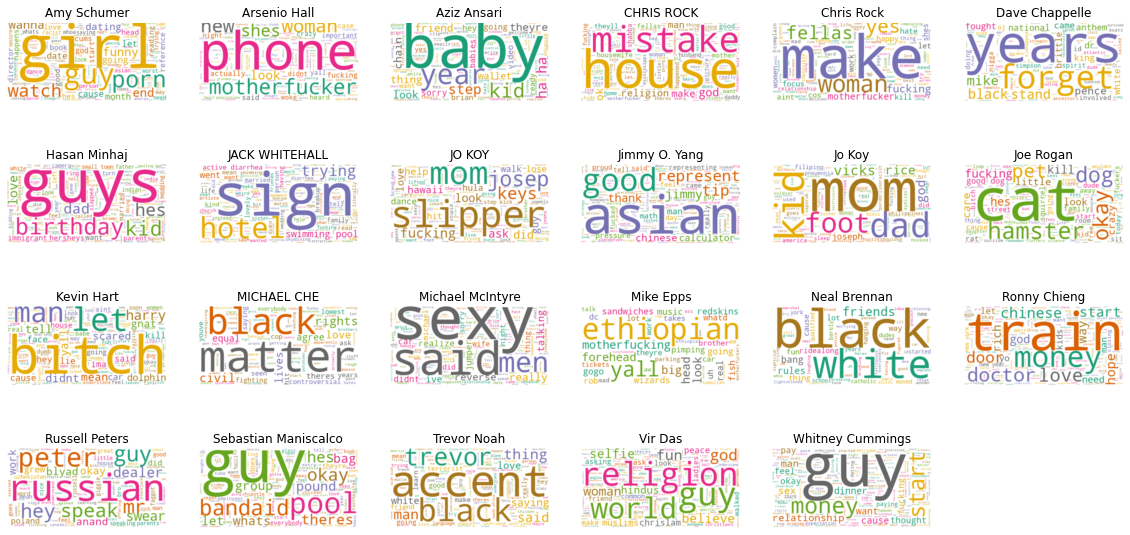

------------- Stop words 1 -------------


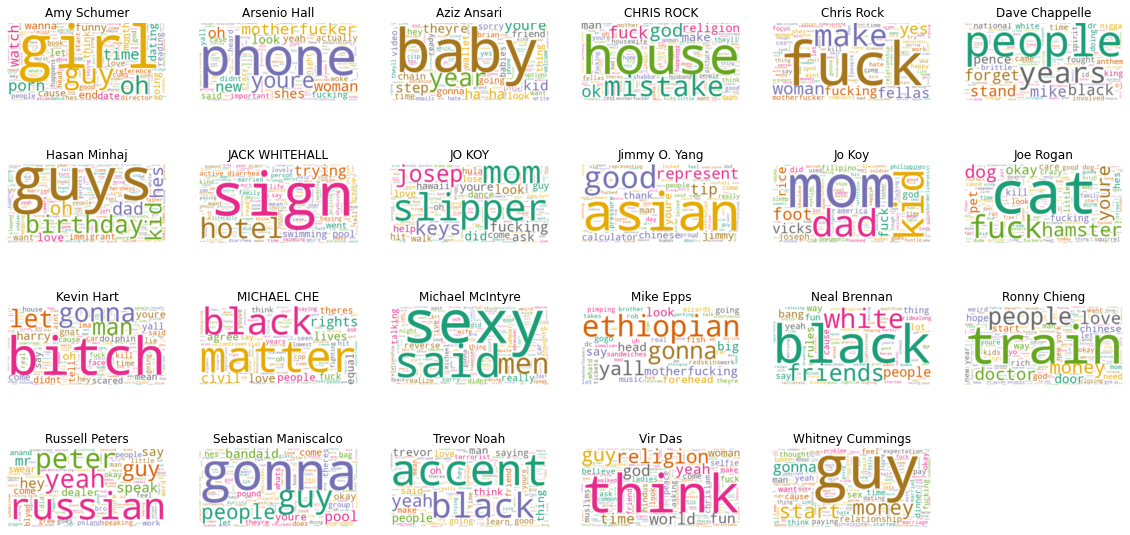

------------- Stop words 2 -------------


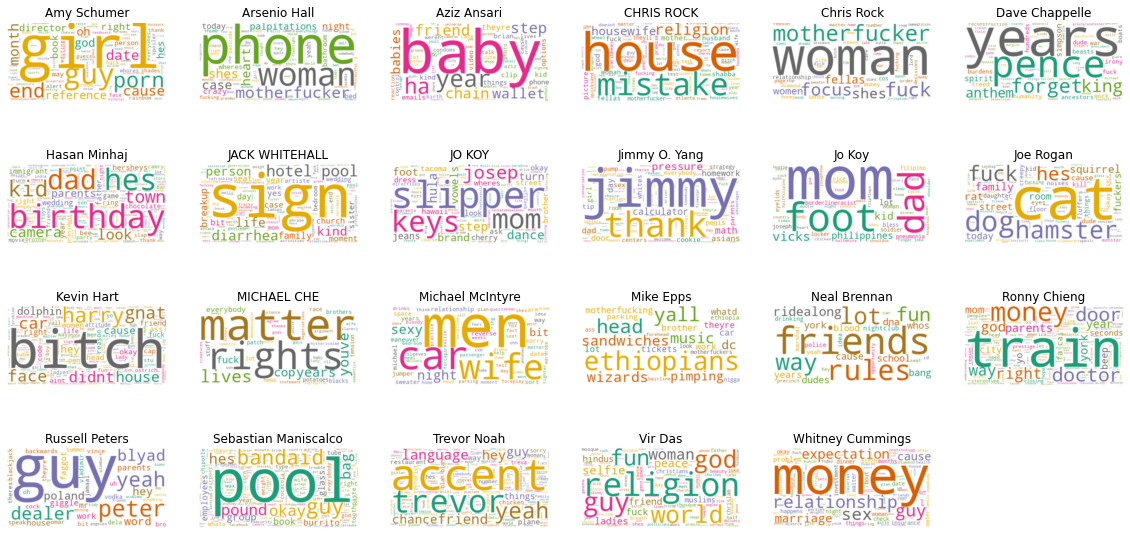

------------- Stop words 3 -------------


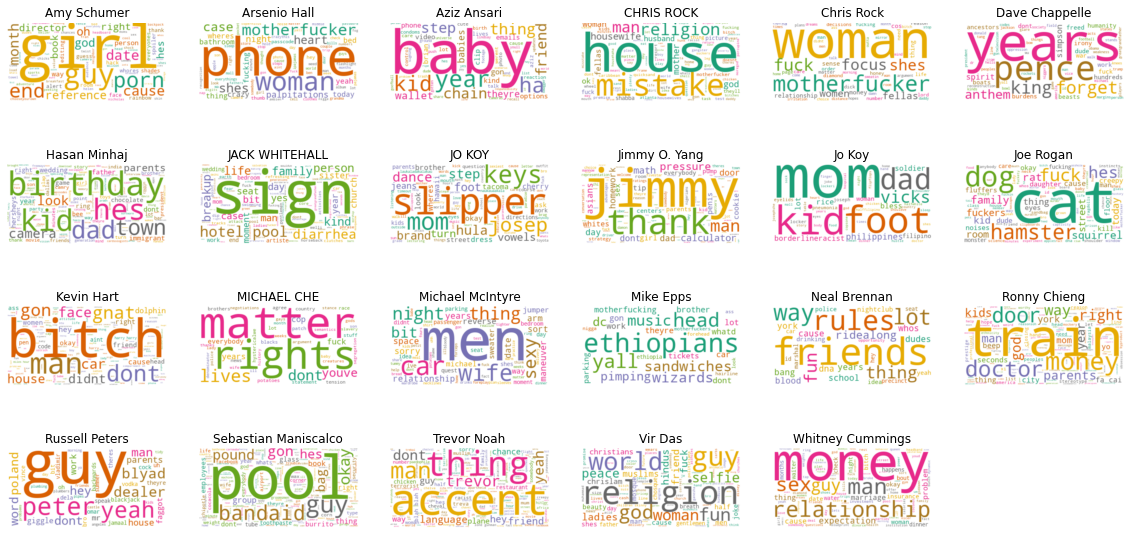

------------- Stop words 4 -------------


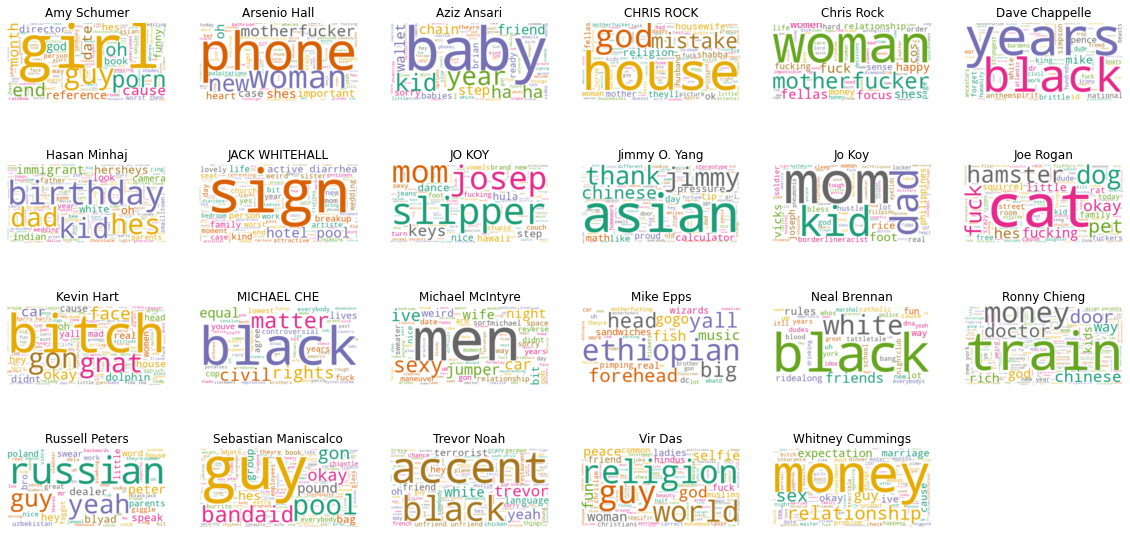

------------- Stop words 5 -------------


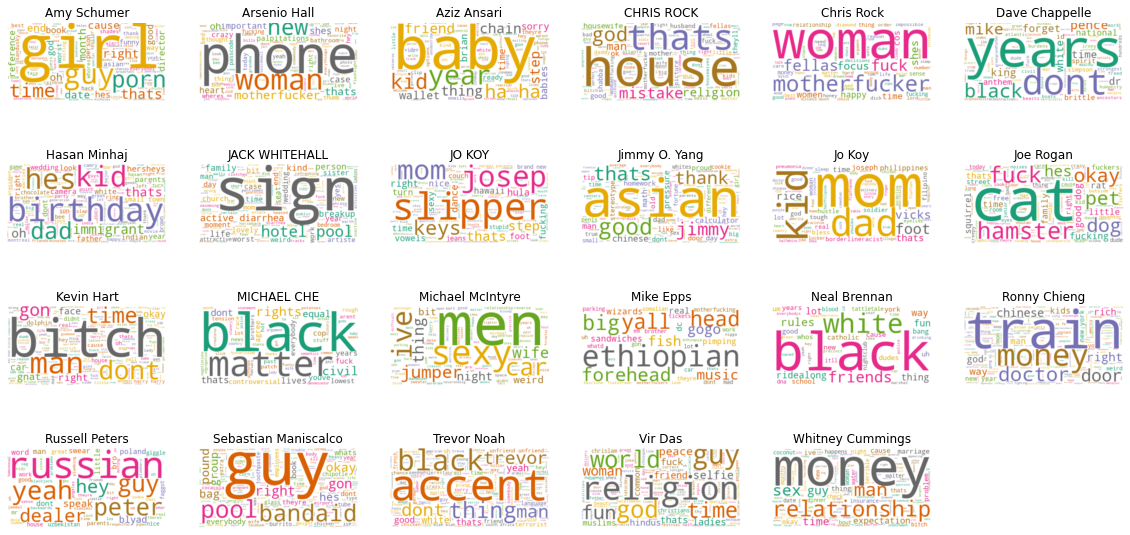

In [17]:
plt.rcParams['figure.figsize'] = [20,10]

comdians = clean_corpus.index

for i, wc in enumerate(wc_list):
    fig = plt.figure()
    if i == 0 or i == 1:
        corpus = clean_corpus
    elif i == 2 or i == 3:
        corpus = corpus_n
    elif i == 4 or i == 5:
        corpus = corpus_na
    print(f"------------- Stop words {i} -------------")
    # Create subplots for each comedian
    for index, comedian in enumerate(comdians):
        wc.generate(corpus.Transcript[comedian])

        plt.subplot(4, 6, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(comdians[index])

    plt.show()